# CS 210 PROJECT

# Information about data set

In [1]:
import reverse_geocoder as rg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy import distance
from datetime import datetime
from scipy import stats
df=pd.read_csv('taxi-trips.csv')
dfsize=len(df.index)
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


In [2]:
print("Shape: ",df.shape)

Shape:  (118185, 11)


In [3]:
print("Descriptive Statistics")
print("Correlations between columns: ", df.corr())
print("\n")
print("Covariance matrix of column values", df.cov())

Descriptive Statistics
Correlations between columns:                     vendor_id  passenger_count  pickup_longitude  \
vendor_id           1.000000         0.293623          0.011391   
passenger_count     0.293623         1.000000         -0.004414   
pickup_longitude    0.011391        -0.004414          1.000000   
pickup_latitude     0.007838        -0.001269         -0.101032   
dropoff_longitude   0.003093        -0.002280          0.384399   
dropoff_latitude    0.006378        -0.003409          0.052744   
trip_duration       0.034313         0.019177          0.064542   

                   pickup_latitude  dropoff_longitude  dropoff_latitude  \
vendor_id                 0.007838           0.003093          0.006378   
passenger_count          -0.001269          -0.002280         -0.003409   
pickup_longitude         -0.101032           0.384399          0.052744   
pickup_latitude           1.000000           0.060402          0.443818   
dropoff_longitude         0.060402

In [4]:
n_rows, n_columns = df.shape  
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

number of rows: 118185, number of columns: 11


In [5]:
df.isnull().sum() #which implies there is no null column


id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [6]:
df.head() #first 5 row of all columns

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695


In [7]:
df.dtypes #here, there are datatypes of values of columns

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

# CREATING TWO NEW COLUMNS: pickup_district and dropoff_district

In [8]:
p_u=[]
d_o=[]
p_long = df['pickup_longitude'].tolist()
p_lat=df['pickup_latitude'].tolist()
d_long=df['dropoff_longitude'].tolist()
d_lat=df['dropoff_latitude'].tolist()
pickup_cor = list(zip(df['pickup_latitude'].tolist(),df['pickup_longitude'].tolist()))
dropoff_cor=list(zip(df['dropoff_latitude'].tolist(),df['dropoff_longitude'].tolist()))
geo_pickup = rg.search(pickup_cor)
geo_dropoff= rg.search(dropoff_cor)
for i in range(dfsize):
    p_u.append(geo_pickup[i]['name'])
    d_o.append(geo_dropoff[i]['name'])
df['pickup_district']=p_u
df['dropoff_district']=d_o

#df.to_csv("kpylol.csv")

    

Loading formatted geocoded file...


# Get most popular districts

In [9]:
print("Most popular 5 leave routes are(Descending order most popular to least):\n") 
print(df['pickup_district'].value_counts().head(5))
print()
print("Most popular 5 arrive routes are(Descending order most popular to least):\n")
print(df['dropoff_district'].value_counts().head(5))



Most popular 5 leave routes are(Descending order most popular to least):

Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: pickup_district, dtype: int64

Most popular 5 arrive routes are(Descending order most popular to least):

Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: dropoff_district, dtype: int64


# Adding Distance Column

In [10]:
def dist(x, y, z, p):
    return distance.distance((x,y),(z,p)).km
#df['distance'] = np.vectorize(dist)(df['pickup_latitude'], df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude'])
df['distance'] =df.apply(lambda df: dist(df['pickup_latitude'], df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude']), axis=1)


# Adding Time of Day Column

In [11]:
def time(x):
    hourint=x[-8:-6]
    hour=int(hourint)  
    if hour>=7 and hour <=9:
        return "rush_hour_morning"
    if hour>9 and hour <=16:
        return "afternoon"
    if hour>16 and hour <=18:
        return "rush_hour_evening"
    if hour>18 and hour <=23:
        return "evening"
    else:
        return "late night"
        
df['time_of_day'] = df.apply(lambda df: time(df['pickup_datetime']), axis=1)



# How the average distance varies as time of the day change

X-axis symbolizes distance in km


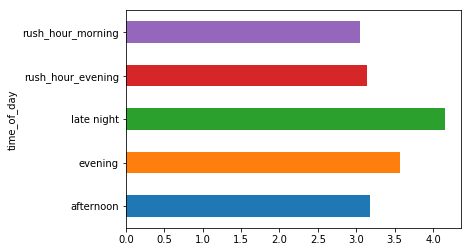

In [12]:
avg_time = df.groupby(by='time_of_day').mean()["distance"]
print("X-axis symbolizes distance in km")
avg_time.plot(kind="barh")

# How the trip duration varies as time of the day change

X-axis symbolizes duration


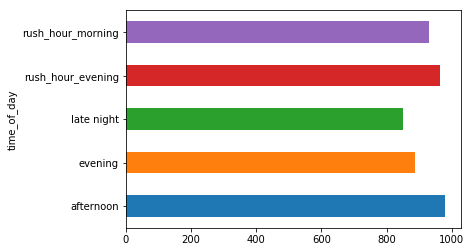

In [13]:
avg_time = df.groupby(by='time_of_day').mean()["trip_duration"] #in the data trip duration is given in seconds i guess
print("X-axis symbolizes duration")
avg_time.plot(kind="barh")

# Null Hypothesis

# 1. Does passenger group size affect the distance?


• Null hypothesis: passenger group size has no effect on the distance.
• Alternative hypothesis: passenger group size has effect on the distance.

Mean distance where passenger count is exactly 1 i.e passenger is alone: 3.36 km
Mean distance where passenger count is more than 1 i.e there are passengers in the cab: 3.49 km
Lets see graph:


C:\Users\ulasm\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


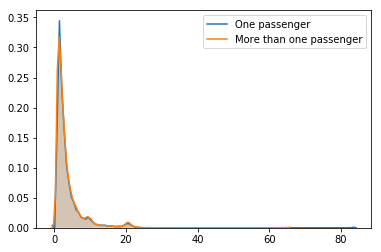

Ttest_indResult(statistic=-4.90336211049223, pvalue=9.445117080445828e-07)

it can be seen that p value is 9.445117080445828e-07 which is smaller than 0.05 we cannot say that null hypthesis is true since there will be difference between distances depending on passenger is alone or there is passengers so we reject the null hypothesis, we accept the alternative hypothesis.


In [14]:
#print(df.head())
print("Mean distance where passenger count is exactly 1 i.e passenger is alone:",round(df['distance'][df['passenger_count']==1].mean(),2),"km")
print("Mean distance where passenger count is more than 1 i.e there are passengers in the cab:",round(df['distance'][df['passenger_count']>1].mean(),2), "km")
#These are means lets now try to find p value
count1_distance = df['distance'][df['passenger_count']==1].values
countmore_distance =df['distance'][df['passenger_count']>1].values
print("Lets see graph:")
ax = sns.kdeplot(df['distance'][df['passenger_count']==1].rename("One passenger"), shade=True)
sns.kdeplot(df['distance'][df['passenger_count']>1].rename("More than one passenger"), ax=ax, shade=True)

plt.show()
p_value = stats.ttest_ind(a=count1_distance, b=countmore_distance, equal_var=False)
print(p_value)
result="it can be seen that p value is 9.445117080445828e-07 which is smaller than 0.05 we cannot say that null hypthesis is true since there will be difference between distances depending on passenger is alone or there is passengers so we reject the null hypothesis, we accept the alternative hypothesis."
print()
print(result)


# 2. Do trip distances increase in weekends?


• Null hypothesis: The day of the week has no effect on the distance.
• Alternative hypothesis: The day of the week has effect on the distance.

Mean distance when day is weekend: 3.5 km
Mean distance when day is weekday: 3.36 km
Lets see graph:
Ttest_indResult(statistic=5.604877366928609, pvalue=2.092414433069292e-08)

it can be seen that p value is 2.092414433069292e-08 which is smaller than 0.05 we cannot say that null hypthesis is true since there will be difference between distances depending on passenger is alone or there is passengers so we reject the null hypothesis, we accept the alternative hypothesis.


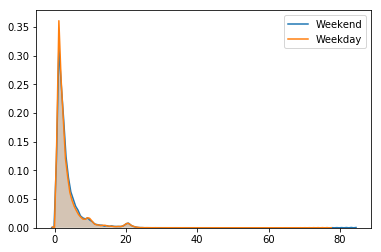

In [15]:
#print(df.head())
import datetime
import calendar
def timefunc(xs):
    x=str(xs)
    tags = { '1' : 'Monday' ,'2' : 'Tuesday' ,'3' : 'Wednesday' ,'4' : 'Thursday' ,'5' : 'Friday' ,'6' : 'Saturday' ,'7' : 'Sunday' }
    year=int(x[0:4])
    month=int(x[5:7])
    day=int(x[8:10])
    dayname=tags[str(datetime.datetime(year,month,day).isoweekday())]
    return dayname

df['date_time'] = df.apply(lambda df: timefunc(df['pickup_datetime']), axis=1)
weekend=(df['distance'][(df['date_time']=="Saturday") | (df['date_time']=="Sunday") ].values)
weekday=(df['distance'][(df['date_time']!="Saturday") & (df['date_time']!="Sunday") ].values)

print("Mean distance when day is weekend:",round(df['distance'][(df['date_time']=="Saturday") | (df['date_time']=="Sunday") ].mean(),2), "km")
print("Mean distance when day is weekday:",round(df['distance'][(df['date_time']!="Saturday") & (df['date_time']!="Sunday") ].mean(),2), "km")


plt.show()
print("Lets see graph:")
ax = sns.kdeplot(df['distance'][(df['date_time']=="Saturday") | (df['date_time']=="Sunday")].rename("Weekend"), shade=True)
sns.kdeplot(df['distance'][(df['date_time']!="Saturday") & (df['date_time']!="Sunday")].rename("Weekday"), ax=ax, shade=True)

p_value = stats.ttest_ind(a=weekend, b=weekday, equal_var=False)
print(p_value)
result2="it can be seen that p value is 2.092414433069292e-08 which is smaller than 0.05 we cannot say that null hypthesis is true since there will be difference between distances depending on passenger is alone or there is passengers so we reject the null hypothesis, we accept the alternative hypothesis."
print()
print(result2)


# Save updated data frame to new excel

In [16]:
df.to_csv("updatedTaxi-Trips.csv")